# Twitter COVID-19 time series combination and analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pylab as plt 
from wordcloud import WordCloud 
%matplotlib inline

# Take a look at the tweetInfo dataset

In [2]:
tweet_dat = pd.read_csv('tweetInfo.csv', index_col=0, encoding = 'utf-8-sig')
tweet_dat['preprocess_text'] = tweet_dat['preprocess_text'].replace(np.nan, '', regex=True)
tweet_dat['preprocess_text'] = tweet_dat['preprocess_text'].astype(str)
print(tweet_dat.shape)
tweet_dat.head()

(703712, 9)


,day,hour,author,text,lang,place,favorite_cnt,retweet_cnt,preprocess_text
month,,,,,,,,,
1,21,22,NFIDvaccines,#Pregnant? Learn tips for having a healthy pre...,en,NaN,2,1,#Pregnant learn tips healthy pregnancy giving ...
1,21,22,BuyDirectUSA,I am wondering with this new mysterious virus ...,en,NaN,5,2,wondering new mysterious virus coming china do...
1,21,23,no_silenced,JUST IN: The first US case of the deadly Wuha...,en,NaN,410,371,first us case deadly wuhan coronavirus washing...
1,21,23,MatthewHilk,BREAKING from @CNN - CDC expected to announce ...,en,NaN,1328,1339,breaking cdc expected announce first u case wu...
1,21,23,g_easton819,CDC expanding coronavirus screening to two mor...,en,NaN,28,42,cdc expanding coronavirus screening two airpor...


## Distributions

In [3]:
author_group = tweet_dat.groupby(['author'])
popular_authors = author_group.agg({'favorite_cnt':'sum', 'retweet_cnt':'sum'})
popular_authors['tweets_cnt'] = author_group.size()

In [4]:
# most active authors in COVID-19
popular_authors.sort_values(['tweets_cnt'], ascending = False).head(10)

,favorite_cnt,retweet_cnt,tweets_cnt
author,,,
Reuters,368810,247451,1782
business,254321,173362,1175
BNODesk,1029979,581236,1167
CNN,1075632,418602,1092
Conflits_FR,1008942,545317,1038
cnni,296111,170705,944
CGTNOfficial,241126,108763,774
WHO,913014,637995,733
globaltimesnews,183313,100689,731


In [5]:
# most popular authors in COVID-19
popular_authors.sort_values(['retweet_cnt','favorite_cnt'], ascending = False).head(10)

,favorite_cnt,retweet_cnt,tweets_cnt
author,,,
realDonaldTrump,9645015,2129242,104
charliekirk11,3340936,1340066,124
KKMPutrajaya,737152,1113643,299
RealJamesWoods,2873505,974397,128
spectatorindex,2236411,937472,572
tedlieu,2385143,823599,180
OH_mes2,1673921,738302,166
washikirei,51775,656119,168
WHO,913014,637995,733


Index(['United States', 'United Kingdom', 'भारत', 'Brasil', 'España',
       'Indonesia', 'Italia', 'Republika ng Pilipinas', 'Canada', 'Nigeria'],
      dtype='object')


D:\ProgramData\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\ProgramData\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\ProgramData\lib\s

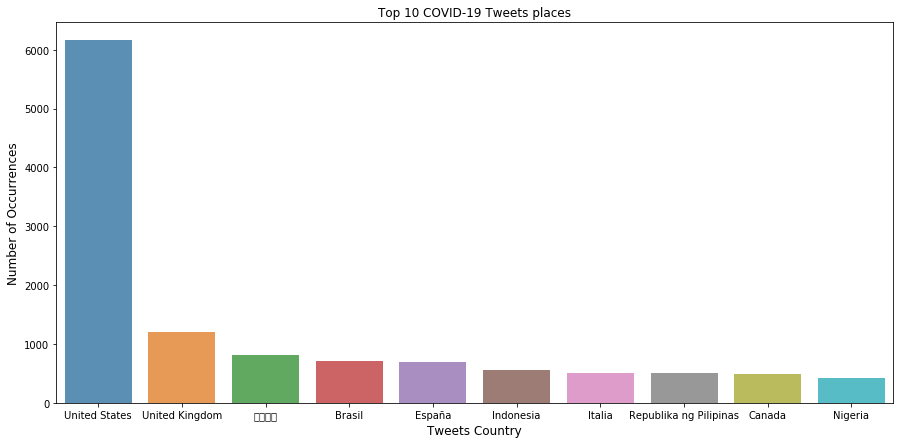

In [6]:
# places
place_cnts = tweet_dat['place'].value_counts()[:10]
print(place_cnts.index)
plt.figure(figsize=(15,7))
sns.barplot(place_cnts.index, place_cnts.values, alpha=0.8)
plt.title('Top 10 COVID-19 Tweets places')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tweets Country', fontsize=12)
#plt.xticks(rotation=45, ha="right")
plt.show()

Index(['en', 'es', 'fr', 'in', 'und', 'pt', 'it', 'ja', 'tr', 'de'], dtype='object')


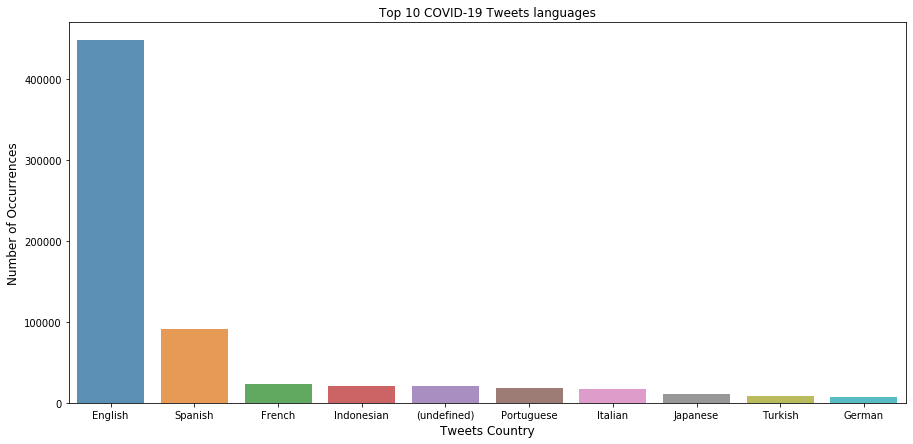

In [7]:
# languages
lang_cnts = tweet_dat['lang'].value_counts()[:10]
d = {'en':'English', 'es':'Spanish', 'in':'Indonesian', 'fr':'French', 'th':'Thai', 'pt':'Portuguese', 'und':'(undefined)', 'ja':'Japanese', 'it':'Italian', 'tr':'Turkish', 'de':'German'}
print(lang_cnts.index)
plt.figure(figsize=(15,7))
names = [d[l] for l in lang_cnts.index]
sns.barplot(names, lang_cnts.values, alpha=0.8)
plt.title('Top 10 COVID-19 Tweets languages')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tweets Country', fontsize=12)
plt.show()

## Preprocessing Text and Visualization

In [8]:
# debug
'''
from tqdm import tqdm
from preprocess_text.preprocess import preprocessing
ind = 42223
with open("bug.txt", 'w') as f:
    f.write(tweet_dat['text'].values[ind])
    
for i in tqdm(range(42100, 42300)):
    print(i)
    if tweet_dat['lang'].values[i] == 'en':
        text = tweet_dat['text'].values[i]
        t = preprocessing(text)
        print(t)
ind = 42223
text = tweet_dat['text'].values[42223]
lang = tweet_dat['lang'].values[ind]
print(text)
print(lang)
t = preprocessing(text)
'''

'\nfrom tqdm import tqdm\nfrom preprocess_text.preprocess import preprocessing\nind = 42223\nwith open("bug.txt", \'w\') as f:\n    f.write(tweet_dat[\'text\'].values[ind])\n    \nfor i in tqdm(range(42100, 42300)):\n    print(i)\n    if tweet_dat[\'lang\'].values[i] == \'en\':\n        text = tweet_dat[\'text\'].values[i]\n        t = preprocessing(text)\n        print(t)\nind = 42223\ntext = tweet_dat[\'text\'].values[42223]\nlang = tweet_dat[\'lang\'].values[ind]\nprint(text)\nprint(lang)\nt = preprocessing(text)\n'

In [9]:
# preprocess text
from tqdm import tqdm
from preprocess_text.preprocess import preprocessing

if 'preprocess_text' not in tweet_dat.columns:
    preprocess_text = []
    i = 0
    for text in tqdm(tweet_dat['text']):
        if tweet_dat['lang'].values[i] == 'en':
            t = preprocessing(text)
            preprocess_text.append(' '.join(t))
        else:
            preprocess_text.append('')
        i += 1
        
    tweet_dat['preprocess_text'] = preprocess_text
    tweet_dat.to_csv('tweetInfo.csv', index = False, encoding = 'utf-8-sig')
    display(tweet_dat.head())


In [10]:
#tweet_dat.drop('preprocess_text', axis=1, inplace=True)

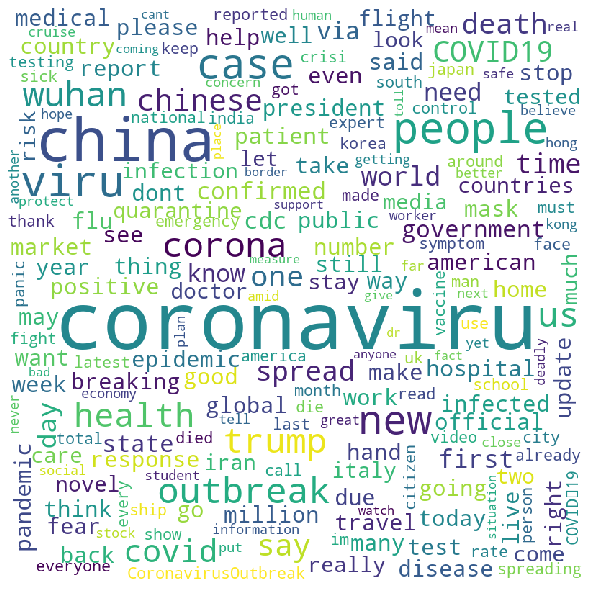

In [11]:
words = ' '.join(tweet_dat['preprocess_text'])
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10, collocations=False).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.savefig("word_cloud.jpeg", dpi=300)
plt.show()

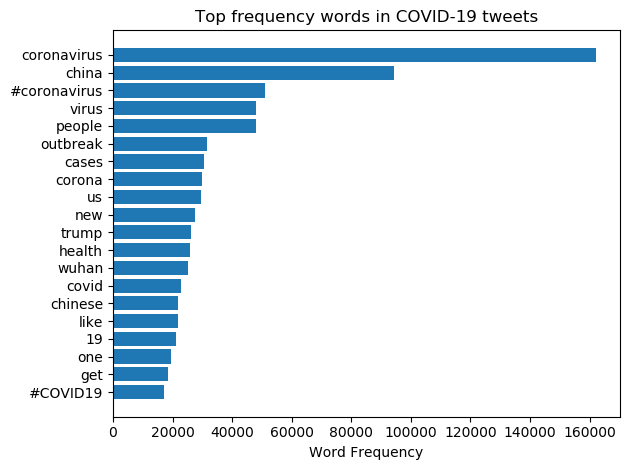

In [12]:
# top frequency words
from collections import Counter
res = Counter(' '.join(tweet_dat['preprocess_text']).split())
freq_word = res.most_common(20)
plt.rcdefaults()
fig, ax = plt.subplots()

accounts = [x[0] for x in freq_word]
freqs = [x[1] for x in freq_word]
y_pos = np.arange(len(accounts))

ax.barh(y_pos, freqs, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(accounts)
ax.invert_yaxis()
ax.set_xlabel('Word Frequency')
ax.set_title('Top frequency words in COVID-19 tweets')
plt.tight_layout()

plt.savefig("word_freq.jpeg", dpi=200)

plt.show()

In [14]:
groups = tweet_dat.groupby(['month','day','hour'])
groups['preprocess_text'].agg(lambda x: Counter(' '.join(x).split())['#Pregnant'])

month  day  hour
1      21   22      1
            23      0
       22   0       0
            1       0
            2       0
                   ..
3      21   2       0
            3       0
            4       0
            5       0
            6       0
Name: preprocess_text, Length: 1385, dtype: int64